In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [53]:
df = pd.read_csv('/content/dummy_data.csv')

In [54]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [56]:
df['platfor'].value_counts()

In [ ]:
df['location'].value_counts()

In [58]:
df['interests'].value_counts()

Lifestlye    341
Sports       331
Travel       328
Name: interests, dtype: int64

In [59]:
def myfunc(age):
  if age < 2:
    return 'baby'
  elif age>2 and age <=10:
    return 'childrain'
  elif age >10 and age<=16:
    return 'teenage'
  elif age >16 and age<=30:
    return 'Yong and adult'
  elif age >30 and age <=50:
    return 'middel aged Adults '
  elif age >50 and age <=70:
    return 'aged'
  else:
    return 'old'

In [60]:
df['age_catogry ']=df['age'].apply(myfunc)
df.sample(5)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_catogry
697,58,non-binary,5,Facebook,Travel,Australia,Urban,Student,12914,False,False,False,aged
911,21,non-binary,8,Facebook,Travel,United Kingdom,Urban,Software Engineer,18893,True,False,True,Yong and adult
855,43,male,5,Instagram,Travel,Australia,Sub_Urban,Student,10233,False,False,False,middel aged Adults
72,53,non-binary,5,Facebook,Sports,United Kingdom,Urban,Student,14958,True,True,True,aged
170,61,non-binary,7,Facebook,Lifestlye,Australia,Rural,Marketer Manager,19945,True,True,True,aged


In [61]:
df.groupby(by=['platform']).agg({'time_spent':'mean'}).reset_index()

,platform,time_spent
0,Facebook,5.055375
1,Instagram,5.151515
2,YouTube,4.869697


In [62]:
df.groupby(by=['gender']).agg({'time_spent':'mean'}).reset_index()

,gender,time_spent
0,female,5.190332
1,male,4.821958
2,non-binary,5.078313


In [63]:
df.groupby(by=['profession']).agg({'time_spent':'mean'}).reset_index()

,profession,time_spent
0,Marketer Manager,5.095775
1,Software Engineer,4.949405
2,Student,5.038835


In [73]:
df2 = df.groupby(by=['profession','platform']).agg({'time_spent':'mean'}).reset_index()

In [74]:
fig = px.bar(df2, x='platform',y='time_spent',color='time_spent',title='Avg. Time spent on Social media platforms' )
fig.show(render='iframe')

In [80]:
avg_stepnt_time = df.groupby(by=['platform','gender','location','age','profession']).agg({'time_spent':'mean'}).reset_index().head(10)
avg_stepnt_time

,platform,gender,location,age,profession,time_spent
0,Facebook,female,Australia,18,Software Engineer,7.0
1,Facebook,female,Australia,19,Marketer Manager,7.0
2,Facebook,female,Australia,21,Marketer Manager,7.0
3,Facebook,female,Australia,23,Software Engineer,4.0
4,Facebook,female,Australia,25,Marketer Manager,8.0
5,Facebook,female,Australia,28,Marketer Manager,9.0
6,Facebook,female,Australia,28,Software Engineer,9.0
7,Facebook,female,Australia,29,Software Engineer,6.5
8,Facebook,female,Australia,33,Marketer Manager,5.0
9,Facebook,female,Australia,33,Software Engineer,5.0


In [75]:
fig=px.bar(avg_stepnt_time,x='age',y='time_spent',color='time_spent',title='Time Spent on Social Media by Gender')
fig.show(render='iframe')

<Axes: xlabel='age', ylabel='Count'>

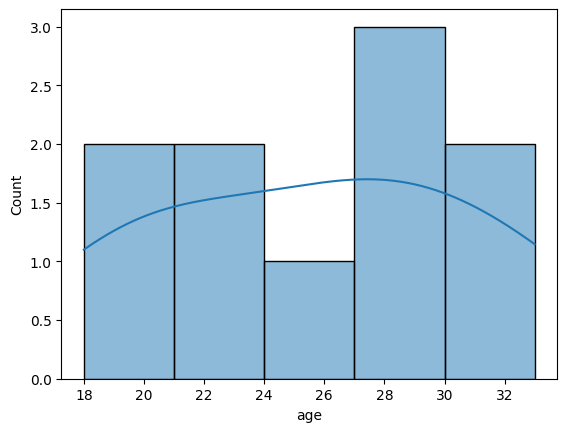

In [66]:
sns.histplot(avg_stepnt_time["age"],kde=True)

In [67]:
df.head(5)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,age_catogry
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,aged
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,middel aged Adults
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,middel aged Adults
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,aged
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Yong and adult


In [83]:
fig=px.bar(avg_stepnt_time,x='profession',y='time_spent',color='platform',barmode='group',title='Average Time Spent on Social Media Platforms by Profession')
fig.show(render='iframe')

<Axes: xlabel='interests', ylabel='count'>

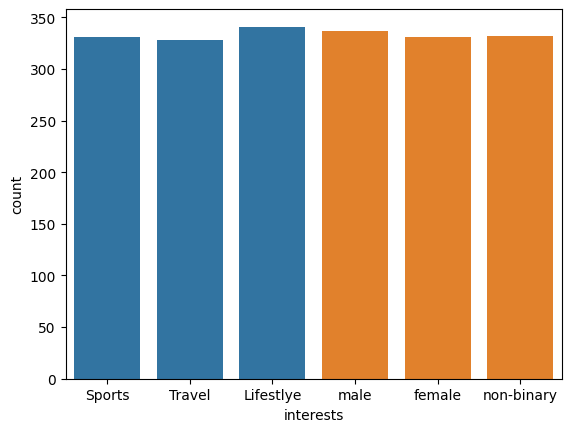

In [90]:
sns.countplot(x=df["interests"])
sns.countplot(x=df["gender"])

<Axes: xlabel='location', ylabel='count'>

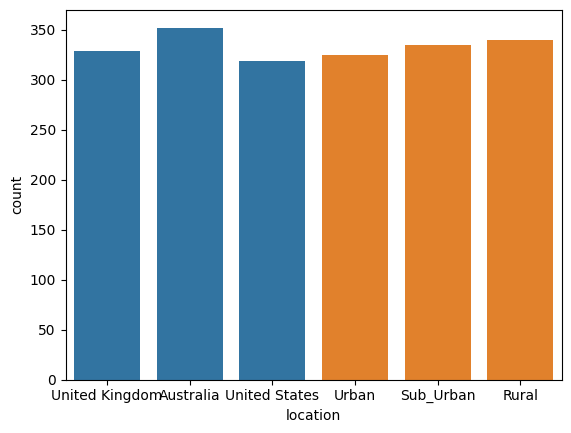

In [92]:
sns.countplot(x=df["location"])
sns.countplot(x=df["demographics"])

<Axes: xlabel='platform', ylabel='count'>

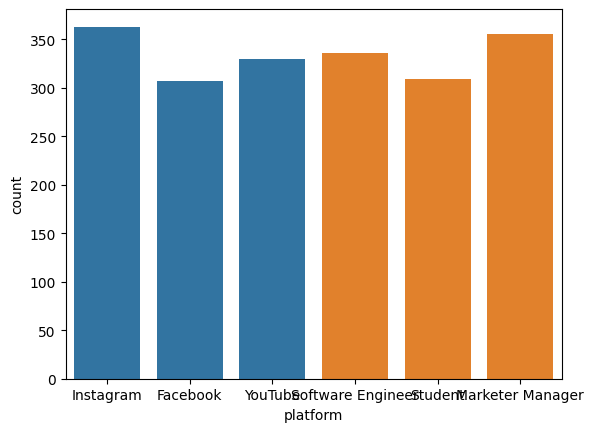

In [91]:
sns.countplot(x=df["platform"])
sns.countplot(x=df["profession"])

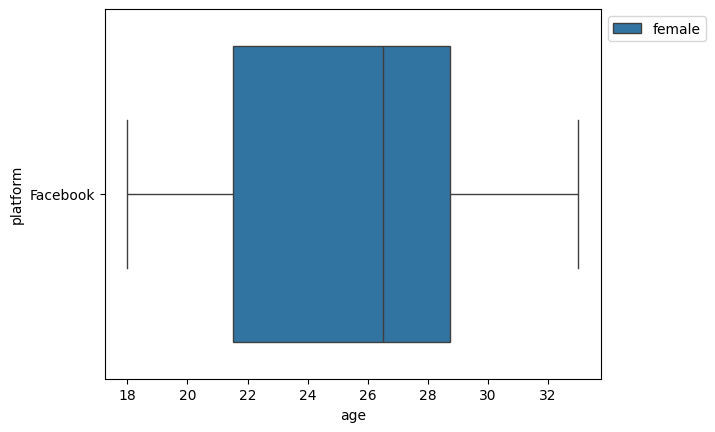

In [101]:
ax = sns.boxplot(x ="age", y="platform",hue = "gender", data =avg_stepnt_time )
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()